In [1]:
import pandas as pd
import requests
from pandasql import sqldf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Используя следующее API:
# https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api - к данному API не получить доступ, если не используешь VPN

In [2]:
#Задание 1 
# ●	Необходимо сформировать таблицы, отражающие статистические данные по прогнозам климатических условий России на 2020-2039 гг на основе двух климатических моделей (выбрать три любые). Таблицы должны содержать для каждого месяца:
# ■	Среднюю температуру
# ■	Среднее количество осадков


In [3]:
# A - экономические цели будут преобладать над экологическими 
# B - экологические критерии и цели устойчивого развити преобладают 
# глобальный общемировой характер - индекс 1 
# региональный характер - индекс 2

In [4]:
#Prediction 2020-2039

In [5]:
#Выбранные климатические модели:
# bccr_bcm2_0
# csiro_mk3_5

# #Доступыне климатические сценарии: 
# А2 и B1 

# #Следовательно, можно создать 4 таблицы с данными о средней температуре за месяц и уровне осадков


In [6]:
# Model bccr_bcm2_0 + a2b1
#Pred of Temp using bccr_bcm2_0 + a2 and b1 scenario 
TEMP_bccr_bcm2_0_A2B1 = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/bccr_bcm2_0/tas/2020/2039/rus')

#Pred of Precip using bccr_bcm2_0 + a2 and b1 scenario
PREC_bccr_bcm2_0_A2B1 = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/bccr_bcm2_0/pr/2020/2039/rus')

# Model csiro_mk3_5 + a2b1
#Pred of Temp using csiro_mk3_5 + a2 and b1 scenario 
TEMP_csiro_mk3_5_A2B1 = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/csiro_mk3_5/tas/2020/2039/rus')

#Pred of Precip using csiro_mk3_5 + a2 and b1 scenario
PREC_csiro_mk3_5_A2B1 = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/csiro_mk3_5/pr/2020/2039/rus')


In [7]:
table1_bccr_bcm2_0_A2 = pd.DataFrame({'month': range(1, 13), '1temp_(C)': eval(TEMP_bccr_bcm2_0_A2B1.text)[0]['monthVals'], 
                                                          '1Precip_(mm)': eval(PREC_bccr_bcm2_0_A2B1.text)[0]['monthVals']})

In [8]:
table2_bccr_bcm2_0_B1 = pd.DataFrame({'month': range(1, 13), '2temp_(C)': eval(TEMP_bccr_bcm2_0_A2B1.text)[1]['monthVals'], 
                                                          '2Precip_(mm)': eval(PREC_bccr_bcm2_0_A2B1.text)[1]['monthVals']})

In [9]:
table3_csiro_mk3_5_A2 = pd.DataFrame({'month': range(1, 13), '3temp_(C)': eval(TEMP_csiro_mk3_5_A2B1.text)[0]['monthVals'], 
                                                          '3Precip_(mm)': eval(PREC_csiro_mk3_5_A2B1.text)[0]['monthVals']})

In [10]:
#Таблица 1
table1_bccr_bcm2_0_A2

,month,1temp_(C),1Precip_(mm)
0,1,-30.696580,25.027958
1,2,-29.240837,20.239909
2,3,-21.377185,24.376222
3,4,-10.446236,29.563610
4,5,0.216428,42.077992
5,6,8.993488,55.247118
6,7,13.763223,58.084618
7,8,11.187580,56.656343
8,9,3.949993,50.468964
9,10,-5.437625,42.377954


In [11]:
#Таблица 2
table2_bccr_bcm2_0_B1

,month,2temp_(C),2Precip_(mm)
0,1,-31.054485,26.217182
1,2,-30.298882,20.797519
2,3,-21.924929,25.191971
3,4,-10.526068,29.731233
4,5,0.160312,41.434368
5,6,8.781147,54.067558
6,7,13.937828,57.067299
7,8,11.387187,56.924196
8,9,4.047901,49.712929
9,10,-5.301260,44.154191


In [12]:
#Таблица 3
table3_csiro_mk3_5_A2

,month,3temp_(C),3Precip_(mm)
0,1,-22.498962,32.212595
1,2,-21.867332,27.295188
2,3,-13.636249,31.447825
3,4,-3.443251,36.691529
4,5,6.703778,54.067293
5,6,13.113313,62.841302
6,7,15.832528,67.584012
7,8,12.974114,62.733016
8,9,6.819138,58.085601
9,10,-0.841364,55.338933


In [13]:
# ●	Объединить таблицы в одну по полю “месяц” с помощью SQL запроса. Если используется pandas, это можно сделать с помощью пакета pandasql:
# https://pypi.org/project/pandasql/

In [14]:
Full_table = sqldf(
 """ SELECT *  
  FROM table1_bccr_bcm2_0_A2 
  inner join table2_bccr_bcm2_0_B1 using(month)
  inner join table3_csiro_mk3_5_A2 using(month)"""
  )

In [15]:
Full_table = Full_table.set_index('month').round(2)

In [16]:
Full_table

,1temp_(C),1Precip_(mm),2temp_(C),2Precip_(mm),3temp_(C),3Precip_(mm)
month,,,,,,
1,-30.70,25.03,-31.05,26.22,-22.50,32.21
2,-29.24,20.24,-30.30,20.80,-21.87,27.30
3,-21.38,24.38,-21.92,25.19,-13.64,31.45
4,-10.45,29.56,-10.53,29.73,-3.44,36.69
5,0.22,42.08,0.16,41.43,6.70,54.07
6,8.99,55.25,8.78,54.07,13.11,62.84
7,13.76,58.08,13.94,57.07,15.83,67.58
8,11.19,56.66,11.39,56.92,12.97,62.73
9,3.95,50.47,4.05,49.71,6.82,58.09


In [17]:
# ●	Для каждого месяца вычислить среднее и дисперсию температуры по моделям.

In [18]:
Full_table_temp = Full_table.drop(['1Precip_(mm)', '2Precip_(mm)', '3Precip_(mm)'], axis=1)
Full_table_temp['Average_Temp'] = Full_table_temp.mean(axis=1).round(2)
Full_table_temp['Variance_Temp'] =  Full_table_temp.drop('Average_Temp', axis=1).var(axis=1, ddof=0).round(2)


In [19]:
Full_table_temp

,1temp_(C),2temp_(C),3temp_(C),Average_Temp,Variance_Temp
month,,,,,
1,-30.70,-31.05,-22.50,-28.08,15.61
2,-29.24,-30.30,-21.87,-27.14,14.06
3,-21.38,-21.92,-13.64,-18.98,14.31
4,-10.45,-10.53,-3.44,-8.14,11.05
5,0.22,0.16,6.70,2.36,9.42
6,8.99,8.78,13.11,10.29,3.97
7,13.76,13.94,15.83,14.51,0.88
8,11.19,11.39,12.97,11.85,0.63
9,3.95,4.05,6.82,4.94,1.77


In [20]:
# ●	Для каждого месяца вычислить среднее и дисперсию количества осадков по моделям.

In [21]:
Full_table_Prec = Full_table.drop(['1temp_(C)', '2temp_(C)', '3temp_(C)'], axis=1)
Full_table_Prec['Average_Prec'] = Full_table_Prec.mean(axis=1).round(2)
Full_table_Prec['Variance_Prec'] =  Full_table_Prec.drop('Average_Prec', axis=1).var(axis=1, ddof=0).round(2)

In [22]:
Full_table_Prec

,1Precip_(mm),2Precip_(mm),3Precip_(mm),Average_Prec,Variance_Prec
month,,,,,
1,25.03,26.22,32.21,27.82,9.87
2,20.24,20.80,27.30,22.78,10.27
3,24.38,25.19,31.45,27.01,9.98
4,29.56,29.73,36.69,31.99,11.03
5,42.08,41.43,54.07,45.86,33.77
6,55.25,54.07,62.84,57.39,15.10
7,58.08,57.07,67.58,60.91,22.41
8,56.66,56.92,62.73,58.77,7.85
9,50.47,49.71,58.09,52.76,14.32


In [23]:
# ●	Привести информативные графики всех величин из задания.

<Figure size 576x216 with 0 Axes>

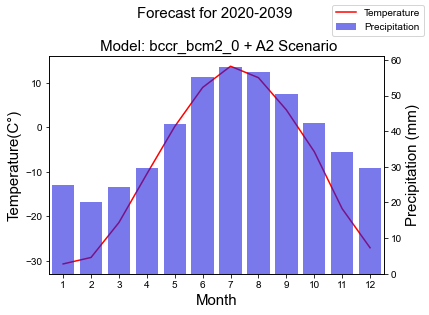

In [24]:
plt.figure(figsize=(8,3))


ax = table1_bccr_bcm2_0_A2.plot(y='1temp_(C)', legend=False, label='Temperature', color='r')  #Temperature
ax2 = ax.twinx() #second scale
sns.barplot(x = 'month', y= '1Precip_(mm)', data=table1_bccr_bcm2_0_A2, label='Precipitation', color="b", alpha=0.6) #Precipitation


ax.figure.legend()
ax.set_ylabel('Temperature(C°)', size='15')
ax2.set_ylabel('Precipitation (mm)', size='15')
ax.set_xlabel('Month', size=15)
plt.title('Forecast for 2020-2039 \n\n Model: bccr_bcm2_0 + A2 Scenario', size='15')

sns.set_style(style='white') #white background

plt.show()

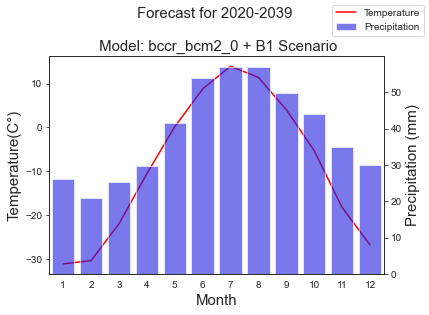

In [25]:
# plt.figure(figsize=(1,3))
# 2temp_(C)	2Precip_(mm)

ax = table2_bccr_bcm2_0_B1.plot(y='2temp_(C)', legend=False, label='Temperature', color='r')  #Temperature
ax2 = ax.twinx() #second scale
sns.barplot(x = 'month', y= '2Precip_(mm)', data=table2_bccr_bcm2_0_B1, label='Precipitation', color="b", alpha=0.6) #Precipitation


ax.figure.legend()
ax.set_ylabel('Temperature(C°)', size='15')
ax2.set_ylabel('Precipitation (mm)', size='15')
ax.set_xlabel('Month', size=15)
plt.title('Forecast for 2020-2039 \n\n Model: bccr_bcm2_0 + B1 Scenario', size='15')

sns.set_style(style='white') #white background

plt.show()

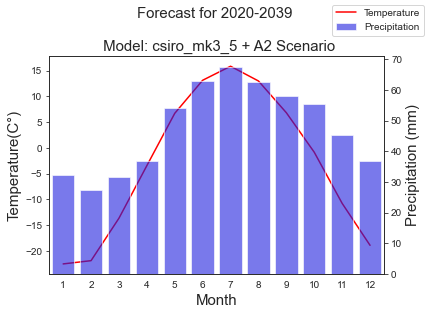

In [26]:

ax = table3_csiro_mk3_5_A2.plot(y='3temp_(C)', legend=False, label='Temperature', color='r')  #Temperature
ax2 = ax.twinx() #second scale
sns.barplot(x = 'month', y= '3Precip_(mm)', data=table3_csiro_mk3_5_A2, label='Precipitation', color="b", alpha=0.6) #Precipitation


ax.figure.legend()
ax.set_ylabel('Temperature(C°)', size='15')
ax2.set_ylabel('Precipitation (mm)', size='15')
ax.set_xlabel('Month', size=15)
plt.title('Forecast for 2020-2039 \n\n Model: csiro_mk3_5 + A2 Scenario', size='15')

sns.set_style(style='white') #white background

plt.show()

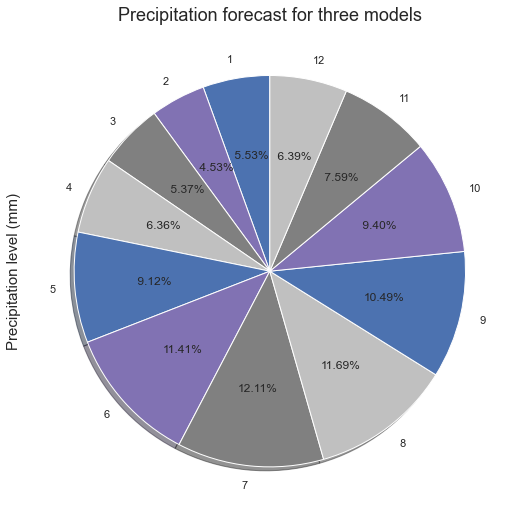

In [27]:
#Full Average Precipitation 
sns.set(rc={'figure.figsize':(12, 9)})

sizes = Full_table_Prec.Average_Prec

cols = ['b','m','grey','silver']

plt.pie(sizes, labels=Full_table_Prec.index, colors=cols, shadow=True, startangle=90, autopct='%5.2f%%')

plt.ylabel("Precipitation level (mm)", size='15')

plt.title("Precipitation forecast for three models", size='18')

plt.show()

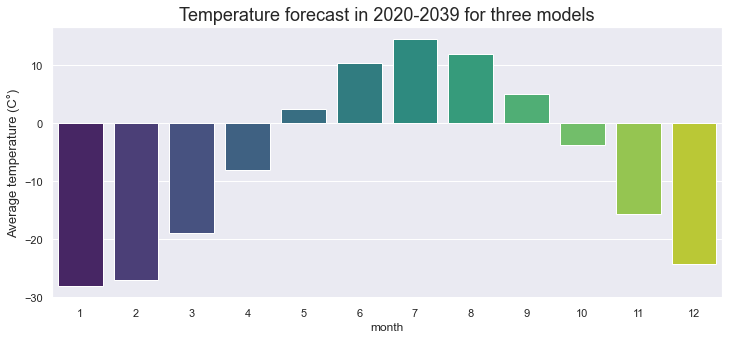

In [28]:
#Average temp 
sns.set(rc={'figure.figsize':(12, 5)})
sns.barplot(x=Full_table_temp.index, y='Average_Temp', data=Full_table_temp, palette='viridis')
# palette='viridis', as_cmap=True
plt.ylabel("Average temperature (C°)", size='13')
plt.title("Temperature forecast in 2020-2039 for three models", size='18');

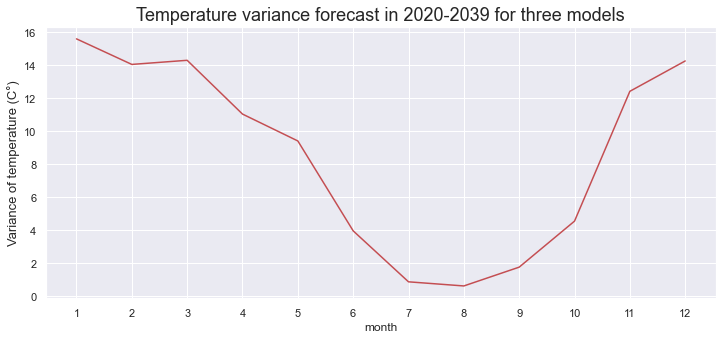

In [29]:
Full_table_temp.Variance_Temp.plot(color='r')
plt.ylabel("Variance of temperature (C°)", size='13')
plt.title("Temperature variance forecast in 2020-2039 for three models", size='18');
plt.xticks(range(1, 13));

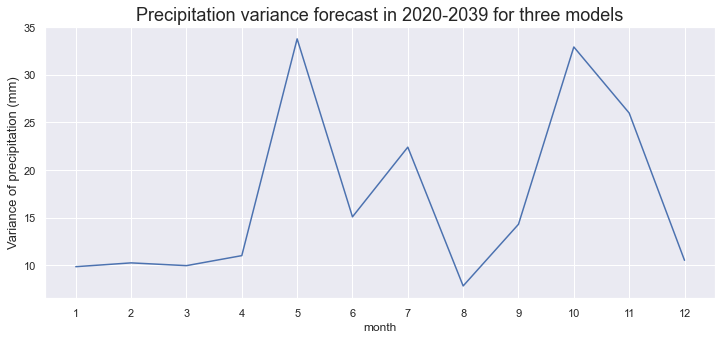

In [30]:
Full_table_Prec.Variance_Prec.plot()
plt.ylabel("Variance of precipitation (mm)", size='13')
plt.title("Precipitation variance forecast in 2020-2039 for three models", size='18');
plt.xticks(range(1, 13));

In [31]:
# ● Есть ли корреляция между количеством осадков и средней температурой?
#Да, есть, корреляция от 94.1% до 95.8%, что говорит о сильной взаимосвязи 

In [32]:
table1_bccr_bcm2_0_A2.drop('month', axis=1).corr()

,1temp_(C),1Precip_(mm)
1temp_(C),1.000000,0.958356
1Precip_(mm),0.958356,1.000000


In [33]:
table2_bccr_bcm2_0_B1.drop('month', axis=1).corr()

,2temp_(C),2Precip_(mm)
2temp_(C),1.000000,0.954941
2Precip_(mm),0.954941,1.000000


In [34]:
table3_csiro_mk3_5_A2.drop('month', axis=1).corr()

,3temp_(C),3Precip_(mm)
3temp_(C),1.000000,0.941682
3Precip_(mm),0.941682,1.000000


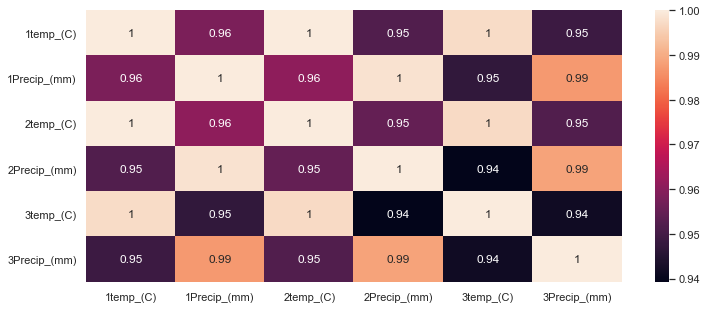

In [35]:
sns.heatmap(Full_table.corr(),annot = True);